In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy.io import loadmat
import seaborn as sns
import pandas as pd

from scipy.signal import spectrogram
from sklearn.cluster import KMeans
from scipy.signal import find_peaks,peak_prominences
from scipy.ndimage import gaussian_filter1d


sns.set(style='ticks',font_scale=1.2)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

%load_ext autoreload
%autoreload 2

In [3]:
PATH = '/Users/bensorscher/Library/CloudStorage/GoogleDrive-bsorsch@gmail.com/My Drive/Mouse Training'

# Load data
fname = 'N2_200203_johncontrasttrack9_train1'
fname += '_stitched'

from spectral_analysis import load_maps, spectral_analysis

N, ntrials, L, zmaps, trial_starts = load_maps(fname, PATH)
f_modules, phi_modules, grid_cell_idxs_modules, t, L, trial_starts = spectral_analysis(N, L, zmaps, trial_starts, windowsize=12)


201 cells, 619 trials, 160 spatial bins
Keeping 3 of 6 modules


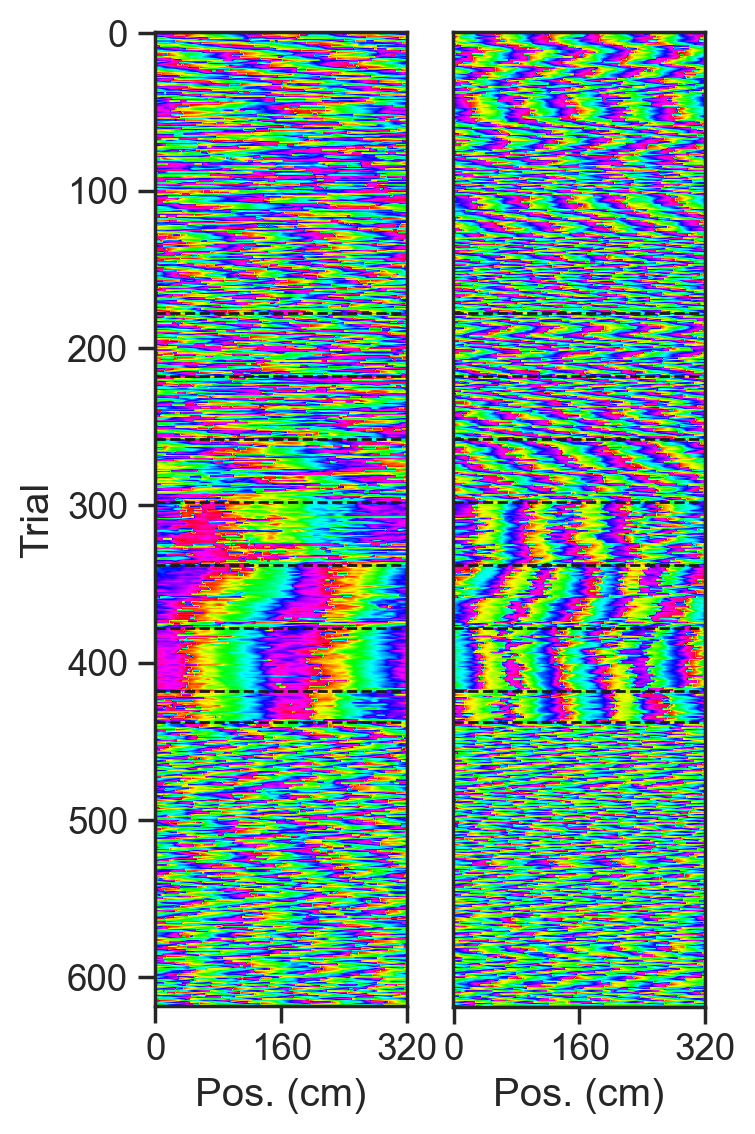

In [9]:
grid_cell_idxs = grid_cell_idxs_modules[1]
phi = phi_modules[1]
Ng = len(grid_cell_idxs)


maps = gaussian_filter1d(zmaps[grid_cell_idxs].reshape(Ng, -1), 2, axis=1)
# maps = zmaps[grid_cell_idxs].reshape(Ng,-1)
angles = np.arctan2(np.cos(phi)@maps, np.sin(phi)@maps)

plt.figure(figsize=(4,7))
plt.subplot(121)
plt.imshow(angles[0].reshape(-1,L),cmap='hsv')
for ts in trial_starts[1:-1]:
    plt.axhline(ts,color='k',linestyle='dashed',linewidth=1)
plt.xticks([0,L//2,L],[0,L,2*L])
plt.xlabel('Pos. (cm)')
plt.ylabel('Trial')


plt.subplot(122)
plt.imshow(angles[2].reshape(-1,L),cmap='hsv')
for ts in trial_starts[1:-1]:
    plt.axhline(ts,color='k',linestyle='dashed',linewidth=1)
plt.yticks([])
plt.xticks([0,L//2,L],[0,L,2*L])
plt.xlabel('Pos. (cm)')

plt.tight_layout(w_pad=0.2)